In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gasto_pens=pd.read_csv(r"C:\Users\GPSantana\Downloads\evolucion_del_gasto_en_pensiones_en_españa_.csv",sep=';')

gasto_pens.head()

,Año,Periodo,Gasto total en pensiones
0,2017,Julio,"8.770,70"
1,2017,Agosto,"8.790,61"
2,2017,Septiembre,"8.807,29"
3,2017,Octubre,"8.831,64"
4,2017,Noviembre,"8.857,95"


In [3]:
gasto_pens["Gasto total en pensiones"] = (
    gasto_pens["Gasto total en pensiones"]
    .str.replace(".", "", regex=False) 
    .str.replace(",", ".", regex=False) 
    .astype(float)
)


gasto_anual = gasto_pens.groupby("Año", as_index=False).agg(
    Gasto_total_pensiones=("Gasto total en pensiones", "sum")
)

gasto_anual = gasto_anual[gasto_anual["Gasto_total_pensiones"] != 0]

gasto_anual["Gasto_total_pensiones"] = gasto_anual["Gasto_total_pensiones"] * 1_000_000

gasto_anual

,Año,Gasto_total_pensiones
0,2017,5.293922e+10
1,2018,1.090841e+11
2,2019,1.157708e+11
3,2020,1.186820e+11
4,2021,1.222725e+11
5,2022,1.300359e+11
6,2023,1.441091e+11
7,2024,1.534959e+11
8,2025,1.355154e+11


In [4]:
gasto_anual=gasto_anual.rename(columns={"Año": "Periodo"})

gasto_anual["Periodo"] = pd.to_numeric(gasto_anual["Periodo"], errors="coerce")

gasto_anual

,Periodo,Gasto_total_pensiones
0,2017,5.293922e+10
1,2018,1.090841e+11
2,2019,1.157708e+11
3,2020,1.186820e+11
4,2021,1.222725e+11
5,2022,1.300359e+11
6,2023,1.441091e+11
7,2024,1.534959e+11
8,2025,1.355154e+11


In [5]:
afiliados=pd.read_csv(r"C:\Users\GPSantana\Downloads\total_afiliados_2017-25.csv",sep=';',encoding='latin1',header=1)

afiliados

,Periodo,CNAE dos dígitos,Total Regimenes(RG+RETA) Total Sexo
0,201701,Total CNAEs (RG+RETA),16323545
1,201801,Total CNAEs (RG+RETA),16944707
2,201901,Total CNAEs (RG+RETA),17469419
3,202001,Total CNAEs (RG+RETA),17842273
4,202101,Total CNAEs (RG+RETA),17610958
5,202201,Total CNAEs (RG+RETA),18367633
6,202301,Total CNAEs (RG+RETA),18880332
7,202401,Total CNAEs (RG+RETA),19429775
8,202501,Total CNAEs (RG+RETA),19919422


In [6]:
afiliados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Periodo                              9 non-null      int64 
 1   CNAE dos dígitos                     9 non-null      object
 2   Total Regimenes(RG+RETA) Total Sexo  9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes


In [7]:
afiliados["Periodo"] = afiliados["Periodo"] // 100

afiliados=afiliados.rename(columns={"Total Regimenes(RG+RETA) Total Sexo": "Total afiliados"})

afiliados=afiliados[["Periodo","Total afiliados"]]

afiliados

,Periodo,Total afiliados
0,2017,16323545
1,2018,16944707
2,2019,17469419
3,2020,17842273
4,2021,17610958
5,2022,18367633
6,2023,18880332
7,2024,19429775
8,2025,19919422


In [8]:
pensiones = pd.read_excel(r"C:\Users\GPSantana\Downloads\Evolucion_pensiones1.xls", header=3)

pensiones.head(30)

,PERIODO,Unnamed: 1,INCAPACIDAD PERMANENTE,JUBILACIÓN,VIUDEDAD,ORFANDAD,F. FAMILIAR,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,NaN,936666,5686678.0,2358932.0,339166.0,39357.0,9360799.0
2,2016,NaN,944600,5784748.0,2364388.0,339471.0,40275.0,9473482.0
3,2017,NaN,951871,5884135.0,2365468.0,339052.0,41244.0,9581770.0
4,2018,NaN,955269,5994755.0,2365497.0,338470.0,42281.0,9696272.0
5,2019,NaN,962035,6089294.0,2366788.0,340106.0,43156.0,9801379.0
6,2020,NaN,948917,6125792.0,2352738.0,338540.0,43032.0,9809019.0
7,2021,NaN,953591,6218551.0,2358328.0,342218.0,44278.0,9916966.0
8,2022,NaN,949781,6302297.0,2356613.0,341311.0,44834.0,9994836.0
9,2023,NaN,945976,6424813.0,2354805.0,340866.0,45531.0,10111991.0


In [9]:
pensiones=pensiones.drop("Unnamed: 1", axis=1)

pensiones = pensiones.drop(pensiones.index[0])

pensiones["PERIODO"] = pd.to_numeric(pensiones["PERIODO"], errors="coerce")

pensiones = pensiones[(pensiones["PERIODO"] >= 2017) & (pensiones["PERIODO"] <= 2025)]

pensiones=pensiones[["PERIODO","TOTAL"]]

pensiones["PERIODO"] = pensiones["PERIODO"].astype(int)

pensiones=pensiones.dropna()

pensiones=pensiones.rename(columns={"PERIODO": "Periodo","TOTAL":"Pensionistas"})

pensiones=pensiones.loc[3:24]

pensiones = pensiones.drop(index=12)

pensiones = pensiones.reset_index(drop=True)

pensiones

,Periodo,Pensionistas
0,2017,9581770.0
1,2018,9696272.0
2,2019,9801379.0
3,2020,9809019.0
4,2021,9916966.0
5,2022,9994836.0
6,2023,10111991.0
7,2024,10281477.0
8,2025,10294786.0


In [10]:
gasto_anual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Periodo                9 non-null      int64  
 1   Gasto_total_pensiones  9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0 bytes


In [11]:
df_merged = (
    pensiones
    .merge(afiliados, on="Periodo")
    .merge(gasto_anual, on="Periodo")
)

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones
0,2017,9581770.0,16323545,5.293922e+10
1,2018,9696272.0,16944707,1.090841e+11
2,2019,9801379.0,17469419,1.157708e+11
3,2020,9809019.0,17842273,1.186820e+11
4,2021,9916966.0,17610958,1.222725e+11
5,2022,9994836.0,18367633,1.300359e+11
6,2023,10111991.0,18880332,1.441091e+11
7,2024,10281477.0,19429775,1.534959e+11
8,2025,10294786.0,19919422,1.355154e+11


In [12]:
valor_inicial = 1800
tasa = 0.033  

df_merged["Cotizacion_media"] = valor_inicial * (1 + tasa) ** (df_merged["Periodo"] - 2017).round(2)

df_merged["Cotizacion_media"]=df_merged["Cotizacion_media"].round(2)

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media
0,2017,9581770.0,16323545,5.293922e+10,1800.00
1,2018,9696272.0,16944707,1.090841e+11,1859.40
2,2019,9801379.0,17469419,1.157708e+11,1920.76
3,2020,9809019.0,17842273,1.186820e+11,1984.15
4,2021,9916966.0,17610958,1.222725e+11,2049.62
5,2022,9994836.0,18367633,1.300359e+11,2117.26
6,2023,10111991.0,18880332,1.441091e+11,2187.13
7,2024,10281477.0,19429775,1.534959e+11,2259.30
8,2025,10294786.0,19919422,1.355154e+11,2333.86


In [13]:
df_merged["Total AxCM"]=(df_merged["Total afiliados"] * (df_merged["Cotizacion_media"])*12)
df_merged["Total AxCM"] = df_merged["Total AxCM"].round(2)

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media,Total AxCM
0,2017,9581770.0,16323545,5.293922e+10,1800.00,3.525886e+11
1,2018,9696272.0,16944707,1.090841e+11,1859.40,3.780839e+11
2,2019,9801379.0,17469419,1.157708e+11,1920.76,4.026547e+11
3,2020,9809019.0,17842273,1.186820e+11,1984.15,4.248210e+11
4,2021,9916966.0,17610958,1.222725e+11,2049.62,4.331493e+11
5,2022,9994836.0,18367633,1.300359e+11,2117.26,4.666687e+11
6,2023,10111991.0,18880332,1.441091e+11,2187.13,4.955249e+11
7,2024,10281477.0,19429775,1.534959e+11,2259.30,5.267723e+11
8,2025,10294786.0,19919422,1.355154e+11,2333.86,5.578697e+11


In [14]:
df_merged["T_AxCM-G"]=(df_merged["Total AxCM"]-df_merged["Gasto_total_pensiones"])
df_merged["T_AxCM-G"] = df_merged["T_AxCM-G"].round(2)

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media,Total AxCM,T_AxCM-G
0,2017,9581770.0,16323545,5.293922e+10,1800.00,3.525886e+11,2.996494e+11
1,2018,9696272.0,16944707,1.090841e+11,1859.40,3.780839e+11,2.689998e+11
2,2019,9801379.0,17469419,1.157708e+11,1920.76,4.026547e+11,2.868839e+11
3,2020,9809019.0,17842273,1.186820e+11,1984.15,4.248210e+11,3.061390e+11
4,2021,9916966.0,17610958,1.222725e+11,2049.62,4.331493e+11,3.108767e+11
5,2022,9994836.0,18367633,1.300359e+11,2117.26,4.666687e+11,3.366328e+11
6,2023,10111991.0,18880332,1.441091e+11,2187.13,4.955249e+11,3.514158e+11
7,2024,10281477.0,19429775,1.534959e+11,2259.30,5.267723e+11,3.732764e+11
8,2025,10294786.0,19919422,1.355154e+11,2333.86,5.578697e+11,4.223543e+11


In [15]:
ingresos_dec= {
    2017: 127399419636.49,
    2018: 135153363473.86,
    2019: 145651422963.14,
    2020: 176508941502.42,
    2021: 178041089643.96,
    2022: 185870736269.79,
    2023: 200454098590.00,
    2024: 216095569105.56,
}

gastos_decl={
    2017:-152825031866.41,
    2018:-160437621256.35,
    2019:-169427908093.97,
    2020:-196145889561.58,
    2021:-197068576088.26,
    2022:-199772531634.34,
    2023:-218909281595.56,
    2024:-232454011959.20,
}

df_merged["Ingresos_dec"] = df_merged["Periodo"].map(ingresos_dec)
df_merged["Gastos_dec"] = df_merged["Periodo"].map(gastos_decl)

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media,Total AxCM,T_AxCM-G,Ingresos_dec,Gastos_dec
0,2017,9581770.0,16323545,5.293922e+10,1800.00,3.525886e+11,2.996494e+11,1.273994e+11,-1.528250e+11
1,2018,9696272.0,16944707,1.090841e+11,1859.40,3.780839e+11,2.689998e+11,1.351534e+11,-1.604376e+11
2,2019,9801379.0,17469419,1.157708e+11,1920.76,4.026547e+11,2.868839e+11,1.456514e+11,-1.694279e+11
3,2020,9809019.0,17842273,1.186820e+11,1984.15,4.248210e+11,3.061390e+11,1.765089e+11,-1.961459e+11
4,2021,9916966.0,17610958,1.222725e+11,2049.62,4.331493e+11,3.108767e+11,1.780411e+11,-1.970686e+11
5,2022,9994836.0,18367633,1.300359e+11,2117.26,4.666687e+11,3.366328e+11,1.858707e+11,-1.997725e+11
6,2023,10111991.0,18880332,1.441091e+11,2187.13,4.955249e+11,3.514158e+11,2.004541e+11,-2.189093e+11
7,2024,10281477.0,19429775,1.534959e+11,2259.30,5.267723e+11,3.732764e+11,2.160956e+11,-2.324540e+11
8,2025,10294786.0,19919422,1.355154e+11,2333.86,5.578697e+11,4.223543e+11,NaN,NaN


In [16]:
df_merged["Saldo_oficial"]=df_merged["Ingresos_dec"]+df_merged["Gastos_dec"]
df_merged["Diferencia_ingresos"]=df_merged["Total AxCM"]-df_merged["Ingresos_dec"]

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media,Total AxCM,T_AxCM-G,Ingresos_dec,Gastos_dec,Saldo_oficial,Diferencia_ingresos
0,2017,9581770.0,16323545,5.293922e+10,1800.00,3.525886e+11,2.996494e+11,1.273994e+11,-1.528250e+11,-2.542561e+10,2.251892e+11
1,2018,9696272.0,16944707,1.090841e+11,1859.40,3.780839e+11,2.689998e+11,1.351534e+11,-1.604376e+11,-2.528426e+10,2.429305e+11
2,2019,9801379.0,17469419,1.157708e+11,1920.76,4.026547e+11,2.868839e+11,1.456514e+11,-1.694279e+11,-2.377649e+10,2.570033e+11
3,2020,9809019.0,17842273,1.186820e+11,1984.15,4.248210e+11,3.061390e+11,1.765089e+11,-1.961459e+11,-1.963695e+10,2.483120e+11
4,2021,9916966.0,17610958,1.222725e+11,2049.62,4.331493e+11,3.108767e+11,1.780411e+11,-1.970686e+11,-1.902749e+10,2.551082e+11
5,2022,9994836.0,18367633,1.300359e+11,2117.26,4.666687e+11,3.366328e+11,1.858707e+11,-1.997725e+11,-1.390180e+10,2.807979e+11
6,2023,10111991.0,18880332,1.441091e+11,2187.13,4.955249e+11,3.514158e+11,2.004541e+11,-2.189093e+11,-1.845518e+10,2.950708e+11
7,2024,10281477.0,19429775,1.534959e+11,2259.30,5.267723e+11,3.732764e+11,2.160956e+11,-2.324540e+11,-1.635844e+10,3.106767e+11
8,2025,10294786.0,19919422,1.355154e+11,2333.86,5.578697e+11,4.223543e+11,NaN,NaN,NaN,NaN


In [17]:
df_merged["Crecimiento_afiliados"] = df_merged["Total afiliados"].pct_change() * 100
df_merged["Crecimiento_pensionistas"] = df_merged["Pensionistas"].pct_change().mean()
df_merged["Gastos_dec"]=df_merged["Gastos_dec"].abs()

df_merged

,Periodo,Pensionistas,Total afiliados,Gasto_total_pensiones,Cotizacion_media,Total AxCM,T_AxCM-G,Ingresos_dec,Gastos_dec,Saldo_oficial,Diferencia_ingresos,Crecimiento_afiliados,Crecimiento_pensionistas
0,2017,9581770.0,16323545,5.293922e+10,1800.00,3.525886e+11,2.996494e+11,1.273994e+11,1.528250e+11,-2.542561e+10,2.251892e+11,NaN,0.009025
1,2018,9696272.0,16944707,1.090841e+11,1859.40,3.780839e+11,2.689998e+11,1.351534e+11,1.604376e+11,-2.528426e+10,2.429305e+11,3.805313,0.009025
2,2019,9801379.0,17469419,1.157708e+11,1920.76,4.026547e+11,2.868839e+11,1.456514e+11,1.694279e+11,-2.377649e+10,2.570033e+11,3.096613,0.009025
3,2020,9809019.0,17842273,1.186820e+11,1984.15,4.248210e+11,3.061390e+11,1.765089e+11,1.961459e+11,-1.963695e+10,2.483120e+11,2.134324,0.009025
4,2021,9916966.0,17610958,1.222725e+11,2049.62,4.331493e+11,3.108767e+11,1.780411e+11,1.970686e+11,-1.902749e+10,2.551082e+11,-1.296444,0.009025
5,2022,9994836.0,18367633,1.300359e+11,2117.26,4.666687e+11,3.366328e+11,1.858707e+11,1.997725e+11,-1.390180e+10,2.807979e+11,4.296615,0.009025
6,2023,10111991.0,18880332,1.441091e+11,2187.13,4.955249e+11,3.514158e+11,2.004541e+11,2.189093e+11,-1.845518e+10,2.950708e+11,2.791318,0.009025
7,2024,10281477.0,19429775,1.534959e+11,2259.30,5.267723e+11,3.732764e+11,2.160956e+11,2.324540e+11,-1.635844e+10,3.106767e+11,2.910134,0.009025
8,2025,10294786.0,19919422,1.355154e+11,2333.86,5.578697e+11,4.223543e+11,NaN,NaN,NaN,NaN,2.520086,0.009025


In [18]:
df_merged.to_csv(r"C:\Users\GPSantana\Downloads\economics.csv", index=False)

In [19]:
media_crec_afi=df_merged["Crecimiento_afiliados"].mean()
media_crec_pens=df_merged["Crecimiento_pensionistas"].mean()


print(media_crec_afi)
print(media_crec_pens)


2.5322448676083544
0.009025423458587228


In [20]:
diferencias = df_merged["Ingresos_dec"] - df_merged["Total AxCM"]

variabilidad_std = diferencias.std()
variabilidad_var = diferencias.var()
variabilidad_rango = diferencias.max() - diferencias.min()
variabilidad_cv = diferencias.std() / diferencias.mean()

print(variabilidad_std)
print(variabilidad_var)
print(variabilidad_rango)
print(variabilidad_cv)

28659141771.818535
8.21346407097194e+20
85487566420.93
-0.10839883388639197


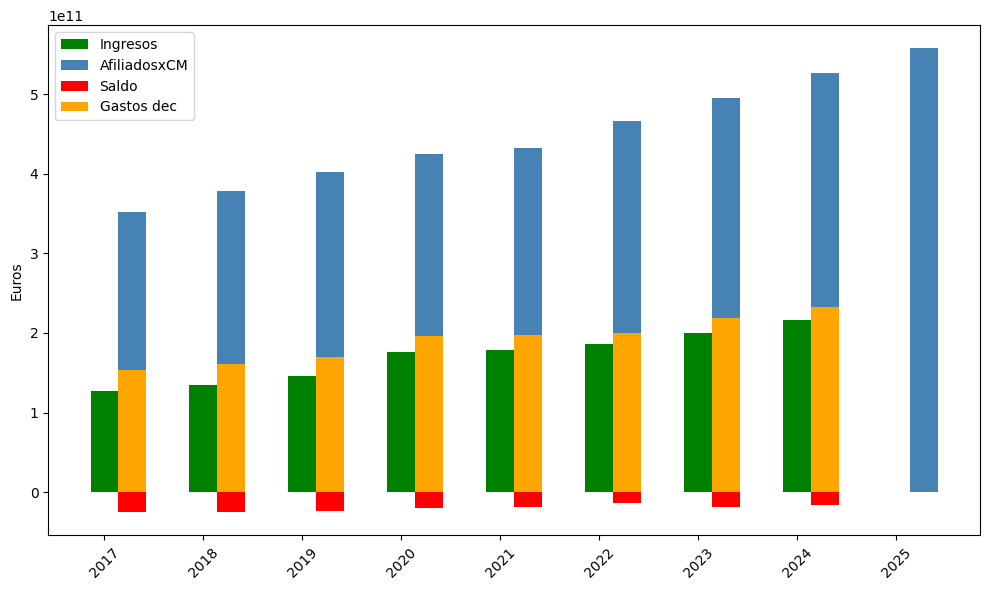

In [21]:

import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(df_merged["Periodo"]))
width = 0.28 

plt.figure(figsize=(10,6))


plt.bar(x, df_merged["Ingresos_dec"], width, label="Ingresos", color="green")
plt.bar(x + width, df_merged["Total AxCM"], width, label="AfiliadosxCM", color="steelblue")
plt.bar(x + width, df_merged["Saldo_oficial"], width, label="Saldo", color="red")
plt.bar(x + width, df_merged["Gastos_dec"], width, label="Gastos dec", color="orange")

plt.xticks(x, df_merged["Periodo"], rotation=45)
plt.ylabel("Euros")
plt.legend()
plt.tight_layout()
plt.show()

